In [4]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation

In [5]:
import numpy as np


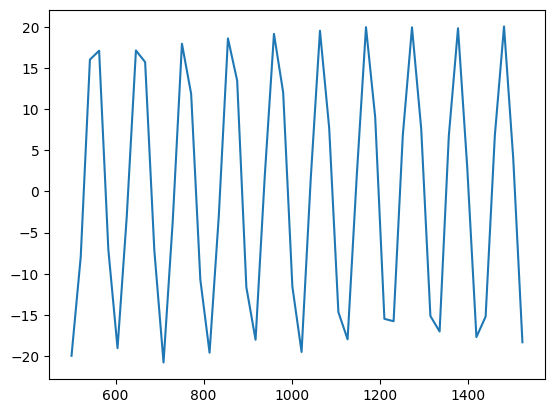

In [16]:
start=500

#x = 0.5-np.random.random(1024)
x = np.cos(0.02*np.linspace(start,start+1024))+np.cos(0.2*np.linspace(start,start+1024))+20*np.cos(200*np.linspace(start,start+1024))

plt.plot(np.linspace(start,start+1024),x)

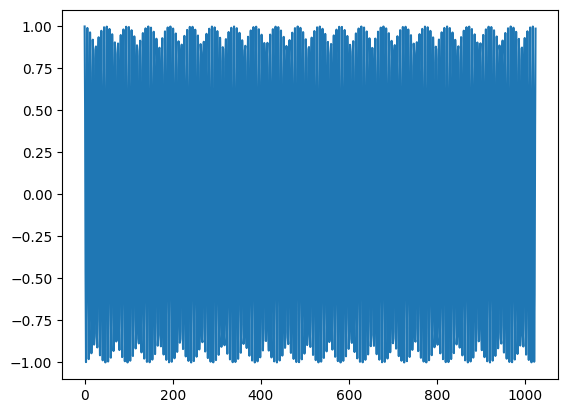

In [17]:
plt.plot(np.linspace(0,1024,1000),np.cos(np.linspace(0,1024,1000)))

In [18]:
#x = np.asarray(x, dtype=float)
N = x.shape[0]
n = np.arange(N)
#n = np.roll(n,int(N/2)-1)
k = n.reshape((N, 1))
M = np.exp(-2j * np.pi * k * n / N)
out = np.dot(M, x)

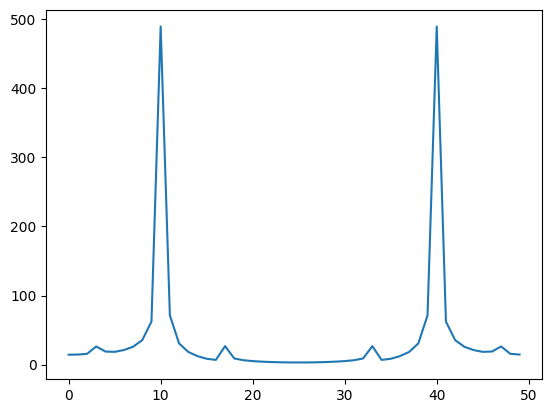

In [19]:
plt.plot(np.abs(out))

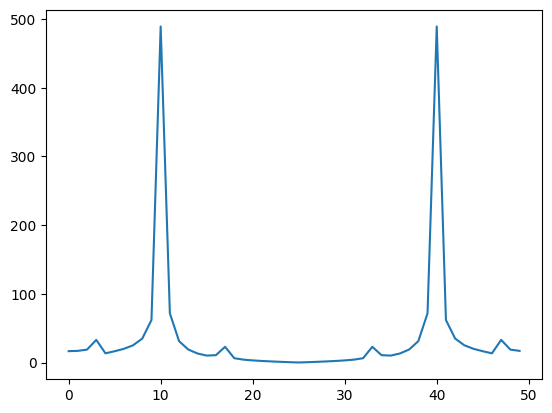

In [13]:
plt.plot(np.abs(out))

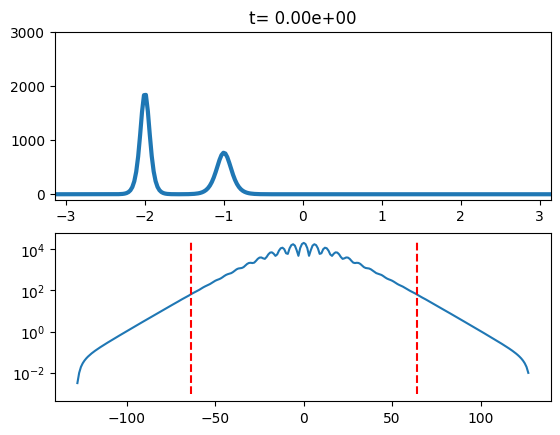

In [132]:
def rk3(u,xi,rhs):
    y2 = u + dt*rhs(u,xi)
    y3 = 0.75*u + 0.25*(y2 + dt*rhs(y2,xi))
    u_new = 1./3 * u + 2./3 * (y3 + dt*rhs(y3,xi))
    return u_new

def rhs(u, xi, equation='KdV'):
    uhat = np.fft.fft(u)
    if equation == 'Burgers': 
        return -u*np.real(np.fft.ifft(1j*xi*uhat)) + np.real(np.fft.ifft(-xi**2*uhat))
    elif equation == 'KdV':
        return -u*np.real(np.fft.ifft(1j*xi*uhat)) - np.real(np.fft.ifft(-1j*xi**3*uhat))
    
# Grid
m = 256
L = 2*np.pi
x = np.arange(-m/2,m/2)*(L/m)
xi = np.fft.fftfreq(m)*m*2*np.pi/L

dt = 1.73/((m/2)**3)

A = 25; B = 16;
u = 3*A**2/np.cosh(0.5*(A*(x+2.)))**2 + 3*B**2/np.cosh(0.5*(B*(x+1)))**2
tmax = 0.006

uhat2 = np.abs(np.fft.fft(u))

num_plots = 50
nplt = np.floor((tmax/num_plots)/dt)
nmax = int(round(tmax/dt))

fig = plt.figure()
axes = fig.add_subplot(211)
axes2 = fig.add_subplot(212)
line, = axes.plot(x,u,lw=3)
line2, = axes2.semilogy(xi,uhat2)
xi_max = np.max(np.abs(xi))
axes2.semilogy([xi_max/2.,xi_max/2.],[1.e-3,25000],'--r')
axes2.semilogy([-xi_max/2.,-xi_max/2.],[1.e-3,25000],'--r')

frames = [u.copy()]
tt = [0]
uuhat = [uhat2]

for n in range(1,nmax+1):
    u_new = rk3(u,xi,rhs)

    u = u_new.copy()
    t = n*dt
    # Plotting
    if np.mod(n,nplt) == 0:
        frames.append(u.copy())
        tt.append(t)
        uhat2 = np.abs(np.fft.fft(u))
        uuhat.append(uhat2)
        
def plot_frame(i):
    line.set_data(x,frames[i])
    line2.set_data(np.sort(xi),uuhat[i][np.argsort(xi)])
    axes.set_title('t= %.2e' % tt[i])
    axes.set_xlim((-np.pi,np.pi))
    axes.set_ylim((-100,3000))
    
matplotlib.animation.FuncAnimation(fig, plot_frame, frames=len(frames), interval=20)

In [76]:
k-(N/2)

array([[-512.],
       [-511.],
       [-510.],
       ...,
       [ 509.],
       [ 510.],
       [ 511.]])

In [94]:
out.shape

(1024,)

In [72]:
npfft=np.fft.fft(x)

In [73]:
npfft

array([511.36168452+0.j        ,   6.82678812-0.84557589j,
        -8.27832339-9.42395088j, ..., -11.4858573 +1.90698628j,
        -8.27832339+9.42395088j,   6.82678812+0.84557589j])

In [91]:
out

array([5.27252242-7.46407495e-13j, 2.71547555-1.04495939e+00j,
       0.5919232 +8.67323530e-02j, ..., 9.78994427-2.24196913e+00j,
       0.5919232 -8.67323530e-02j, 2.71547555+1.04495939e+00j])

In [92]:
k

array([[-512.],
       [-511.],
       [-510.],
       ...,
       [ 509.],
       [ 510.],
       [ 511.]])

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
## Generate test function
x=np.linspace(0,20,500)

def y(x):
    return np.cos(5*x)+0*np.sin(5*x)

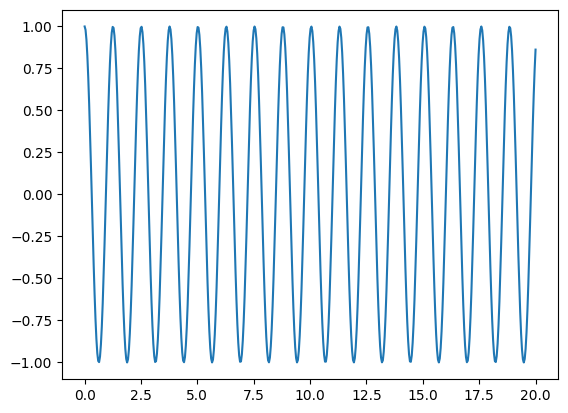

In [35]:
plot.plot(np.linspace)

In [36]:
## Take fft, plot fft
transform=np.fft.fft(y(x))

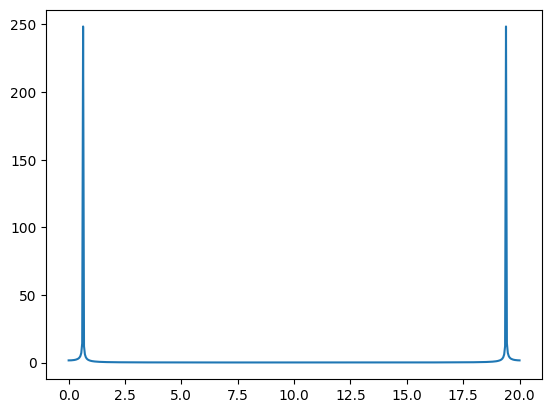

In [38]:
plt.plot(x,np.abs(transform))

In [ ]:
## Inverse, reconstruct

In [39]:
N=100
n = np.arange(N)
k = n.reshape((N, 1))

In [48]:
from IPython.display import display, HTML
from IPython.html import widgets
from IPython.html.widgets import interact, interactive

def plot_sine(wavenumber=4,grid_points=12,plot_sine='On'):
    "Plot sin(2*pi*p), sampled at m equispaced points."
    x  = np.linspace(0,1,grid_points+2); # grid
    xf = np.linspace(0,1,1000) # fine grid
    y  = np.sin(wavenumber*np.pi*x)
    yf = np.sin(wavenumber*np.pi*xf)
    fig = plt.figure(figsize = (8, 6));
    ax = fig.add_subplot(1,1,1);
    if plot_sine == 'On':
        ax.plot(xf, yf, 'r-', linewidth=2);
    ax.plot(x,  y,  'o-', lw=2)

interact(plot_sine, wavenumber=(1,44,1), grid_points=(10, 16, 1), plot_sine=(('On','Off')))

ModuleNotFoundError: No module named 'IPython.html'

In [42]:
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [43]:
x

array([0.12264436, 0.13082884, 0.39628314, ..., 0.11712939, 0.60877752,
       0.44632696])

In [46]:
x = np.random.random(1024)

#x = np.asarray(x, dtype=float)
N = x.shape[0]
n = np.arange(N)
k = n.reshape((N, 1))
M = np.exp(-2j * np.pi * k * n / N)
out = np.dot(M, x)

In [47]:
out

array([518.47098365+0.j        ,   2.16026912+9.97595986j,
        14.46411608+4.31979037j, ...,  -3.33341344+6.57298085j,
        14.46411608-4.31979037j,   2.16026912-9.97595986j])

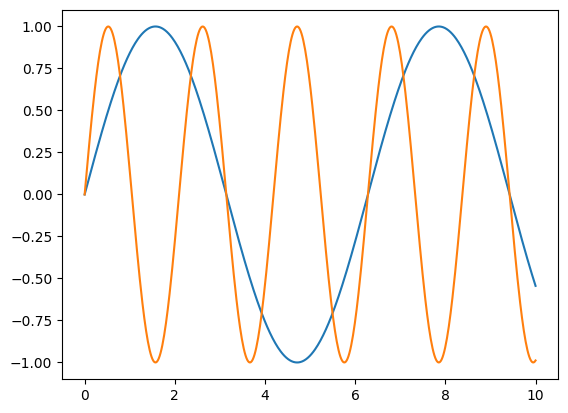

In [60]:
nsamp=500

x1=np.linspace(0,10,nsamp)
y1=np.sin(x1)
x2=np.linspace(0,10,nsamp)
y2=np.sin(3*x1)


plt.plot(x1,y1)
plt.plot(x2,y2)

In [61]:
def plot_sine(wavenumber=4,grid_points=12,plot_sine='On'):
    "Plot sin(2*pi*p), sampled at m equispaced points."
    x  = np.linspace(0,1,grid_points+2); # grid
    xf = np.linspace(0,1,1000) # fine grid
    y  = np.sin(wavenumber*np.pi*x)
    yf = np.sin(wavenumber*np.pi*xf)
    fig = plt.figure(figsize = (8, 6));
    ax = fig.add_subplot(1,1,1);
    if plot_sine == 'On':
        ax.plot(xf, yf, 'r-', linewidth=2);
    ax.plot(x,  y,  'o-', lw=2)

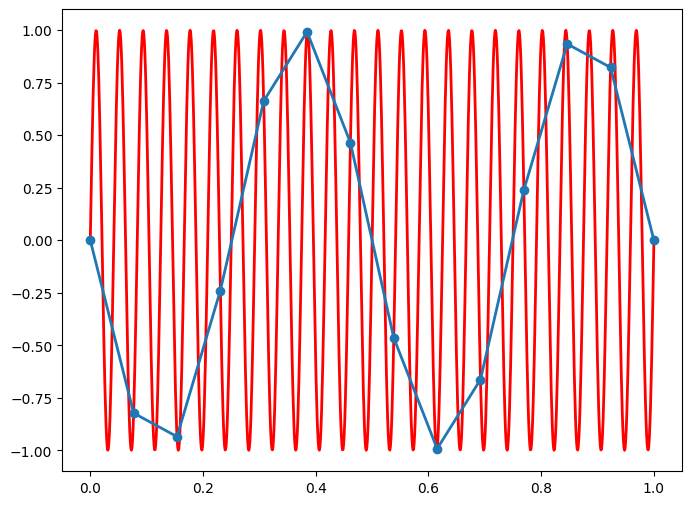

In [67]:
plot_sine(wavenumber=48)